In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,974 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and dire

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings(action='ignore')

import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model

# 1. 데이터 로드

In [24]:
df = pd.read_csv('/content/drive/MyDrive/전주시 공모전/데이터/finla_data_22동_최종.csv')
df

,실제 행정동,행정동,인구,합계원표,남자노인수,여자노인수,범죄신고비율,남자노인수비율,여자노인수비율,경로당,...,보안등,CCTV_개수,60대,70대,80대,90대 이상,총_노인시설,총_노인인구,총_의료기관,안전_지표
0,"금암1동,금암2동",금암동,17432,16632,1791,2419,0.054149,0.097131,0.131189,14,...,18,140,1224,1846,1003,135,14,4210,42,18
1,노송동,노송동,10457,9163,1375,1869,0.029832,0.033903,0.046083,21,...,10,177,888,1402,819,130,22,3244,28,11
2,덕진동,덕진동,20590,8316,1349,1793,0.027074,0.031689,0.042119,25,...,10,196,985,1362,711,83,26,3142,42,11
3,동서학동,동서학동,5847,9163,887,1163,0.029832,0.042377,0.055564,15,...,10,71,645,843,489,72,22,2050,6,10
4,"삼천1동,삼천2동,삼천3동",삼천동,44894,27489,4255,5407,0.089496,0.028624,0.036373,53,...,30,238,3565,3879,1873,334,60,9662,50,31
5,서서학동,서서학동,7950,9163,1097,1540,0.029832,0.115583,0.162259,20,...,10,74,852,1145,577,59,21,2637,11,11
6,서신동,서신동,39149,9163,2469,3223,0.029832,0.059447,0.077601,26,...,10,176,1980,2290,1254,163,27,5692,90,11
7,"송천1동,송천2동",송천동,90039,16632,4372,5549,0.054149,0.020743,0.026327,69,...,20,237,3738,4019,1842,318,70,9921,126,22
8,여의동,여의동,15946,8316,1307,1655,0.027074,0.007786,0.009859,31,...,0,81,1041,1203,620,95,31,2962,17,1
9,완산동,완산동,4898,9163,659,925,0.029832,0.020210,0.028368,10,...,10,134,442,694,386,62,10,1584,6,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   실제 행정동   22 non-null     object 
 1   행정동      22 non-null     object 
 2   인구       22 non-null     int64  
 3   합계원표     22 non-null     int64  
 4   남자노인수    22 non-null     int64  
 5   여자노인수    22 non-null     int64  
 6   범죄신고비율   22 non-null     float64
 7   남자노인수비율  22 non-null     float64
 8   여자노인수비율  22 non-null     float64
 9   경로당      22 non-null     int64  
 10  노인복지시설   22 non-null     int64  
 11  병원       22 non-null     int64  
 12  의원       22 non-null     int64  
 13  경찰서      22 non-null     int64  
 14  보안등      22 non-null     int64  
 15  CCTV_개수  22 non-null     int64  
 16  60대      22 non-null     int64  
 17  70대      22 non-null     int64  
 18  80대      22 non-null     int64  
 19  90대 이상   22 non-null     int64  
 20  총_노인시설   22 non-null     int64  
 21  총_노인인구   22 non-nu

In [20]:
df.columns

Index(['실제 행정동', '행정동', '인구', '합계원표', '남자노인수', '여자노인수', '범죄신고비율', '남자노인수비율',
       '여자노인수비율', '경로당', '노인복지시설', '병원', '의원', '경찰서', '보안등', 'CCTV_개수', '60대',
       '70대', '80대', '90대 이상', '총_노인시설', '총_노인인구', '총_의료기관', '안전_지표'],
      dtype='object')

In [37]:
df_new.columns

Index(['행정동', '법정동 ', '경로당', '노인복지시설', '병원', '의원', '경찰서', '보안등', 'CCTV_개수'], dtype='object')

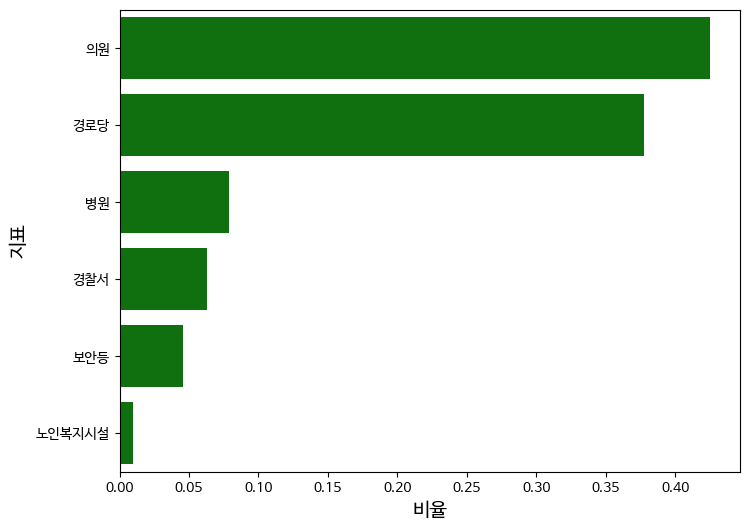

In [38]:
df_new = pd.read_csv('/content/drive/MyDrive/전주시 공모전/전주시_법정동_최종_데이터/finla_data_후보군 입지 - finla_data_22동_최종.csv')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False


rf = RandomForestRegressor(n_estimators=100, random_state=42)

df_features = df_new.drop(columns=['행정동','법정동 ','CCTV_개수'])
df_target = df_new['CCTV_개수']

X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2)
rf.fit(X_train, y_train)

ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index, color ='green')

plt.xlabel('비율', fontsize=14)
plt.ylabel('지표', fontsize=14)
plt.show()

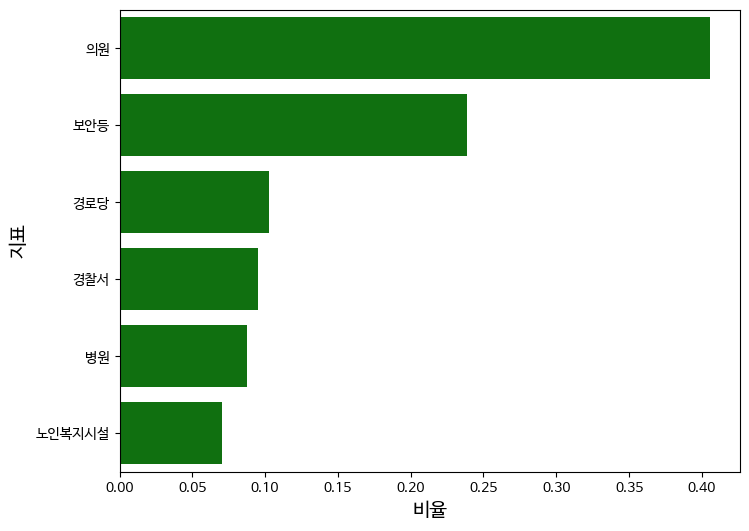

In [35]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False


rf = RandomForestRegressor(n_estimators=100, random_state=42)

df_features = df_rf.drop(columns=['행정동','CCTV_개수'])
df_target = df_rf['CCTV_개수']

X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2)
rf.fit(X_train, y_train)

ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index, color ='green')

plt.xlabel('비율', fontsize=14)
plt.ylabel('지표', fontsize=14)
plt.show()

In [25]:
df = df.iloc[:, [1,2,4,5,15,16,17,18,19,20,21,22,23]]
df

,행정동,인구,남자노인수,여자노인수,CCTV_개수,60대,70대,80대,90대 이상,총_노인시설,총_노인인구,총_의료기관,안전_지표
0,금암동,17432,1791,2419,140,1224,1846,1003,135,14,4210,42,18
1,노송동,10457,1375,1869,177,888,1402,819,130,22,3244,28,11
2,덕진동,20590,1349,1793,196,985,1362,711,83,26,3142,42,11
3,동서학동,5847,887,1163,71,645,843,489,72,22,2050,6,10
4,삼천동,44894,4255,5407,238,3565,3879,1873,334,60,9662,50,31
5,서서학동,7950,1097,1540,74,852,1145,577,59,21,2637,11,11
6,서신동,39149,2469,3223,176,1980,2290,1254,163,27,5692,90,11
7,송천동,90039,4372,5549,237,3738,4019,1842,318,70,9921,126,22
8,여의동,15946,1307,1655,81,1041,1203,620,95,31,2962,17,1
9,완산동,4898,659,925,134,442,694,386,62,10,1584,6,10


## 새로운 지표 생성

In [ ]:
df['총_노인시설'] = df['노인복지시설'] + df['경로당']
df['총_노인인구'] = df['남자노인수'] + df['여자노인수']
df['총_의료기관'] = df['병원'] + df['의원']
df['안전_지표'] =df['경찰서'] + df['보안등']
df = df.iloc[:, [0,1,2,3] + list(range(10, df.shape[1]))]
df

KeyError: '노인복지시설'

# 상관관계

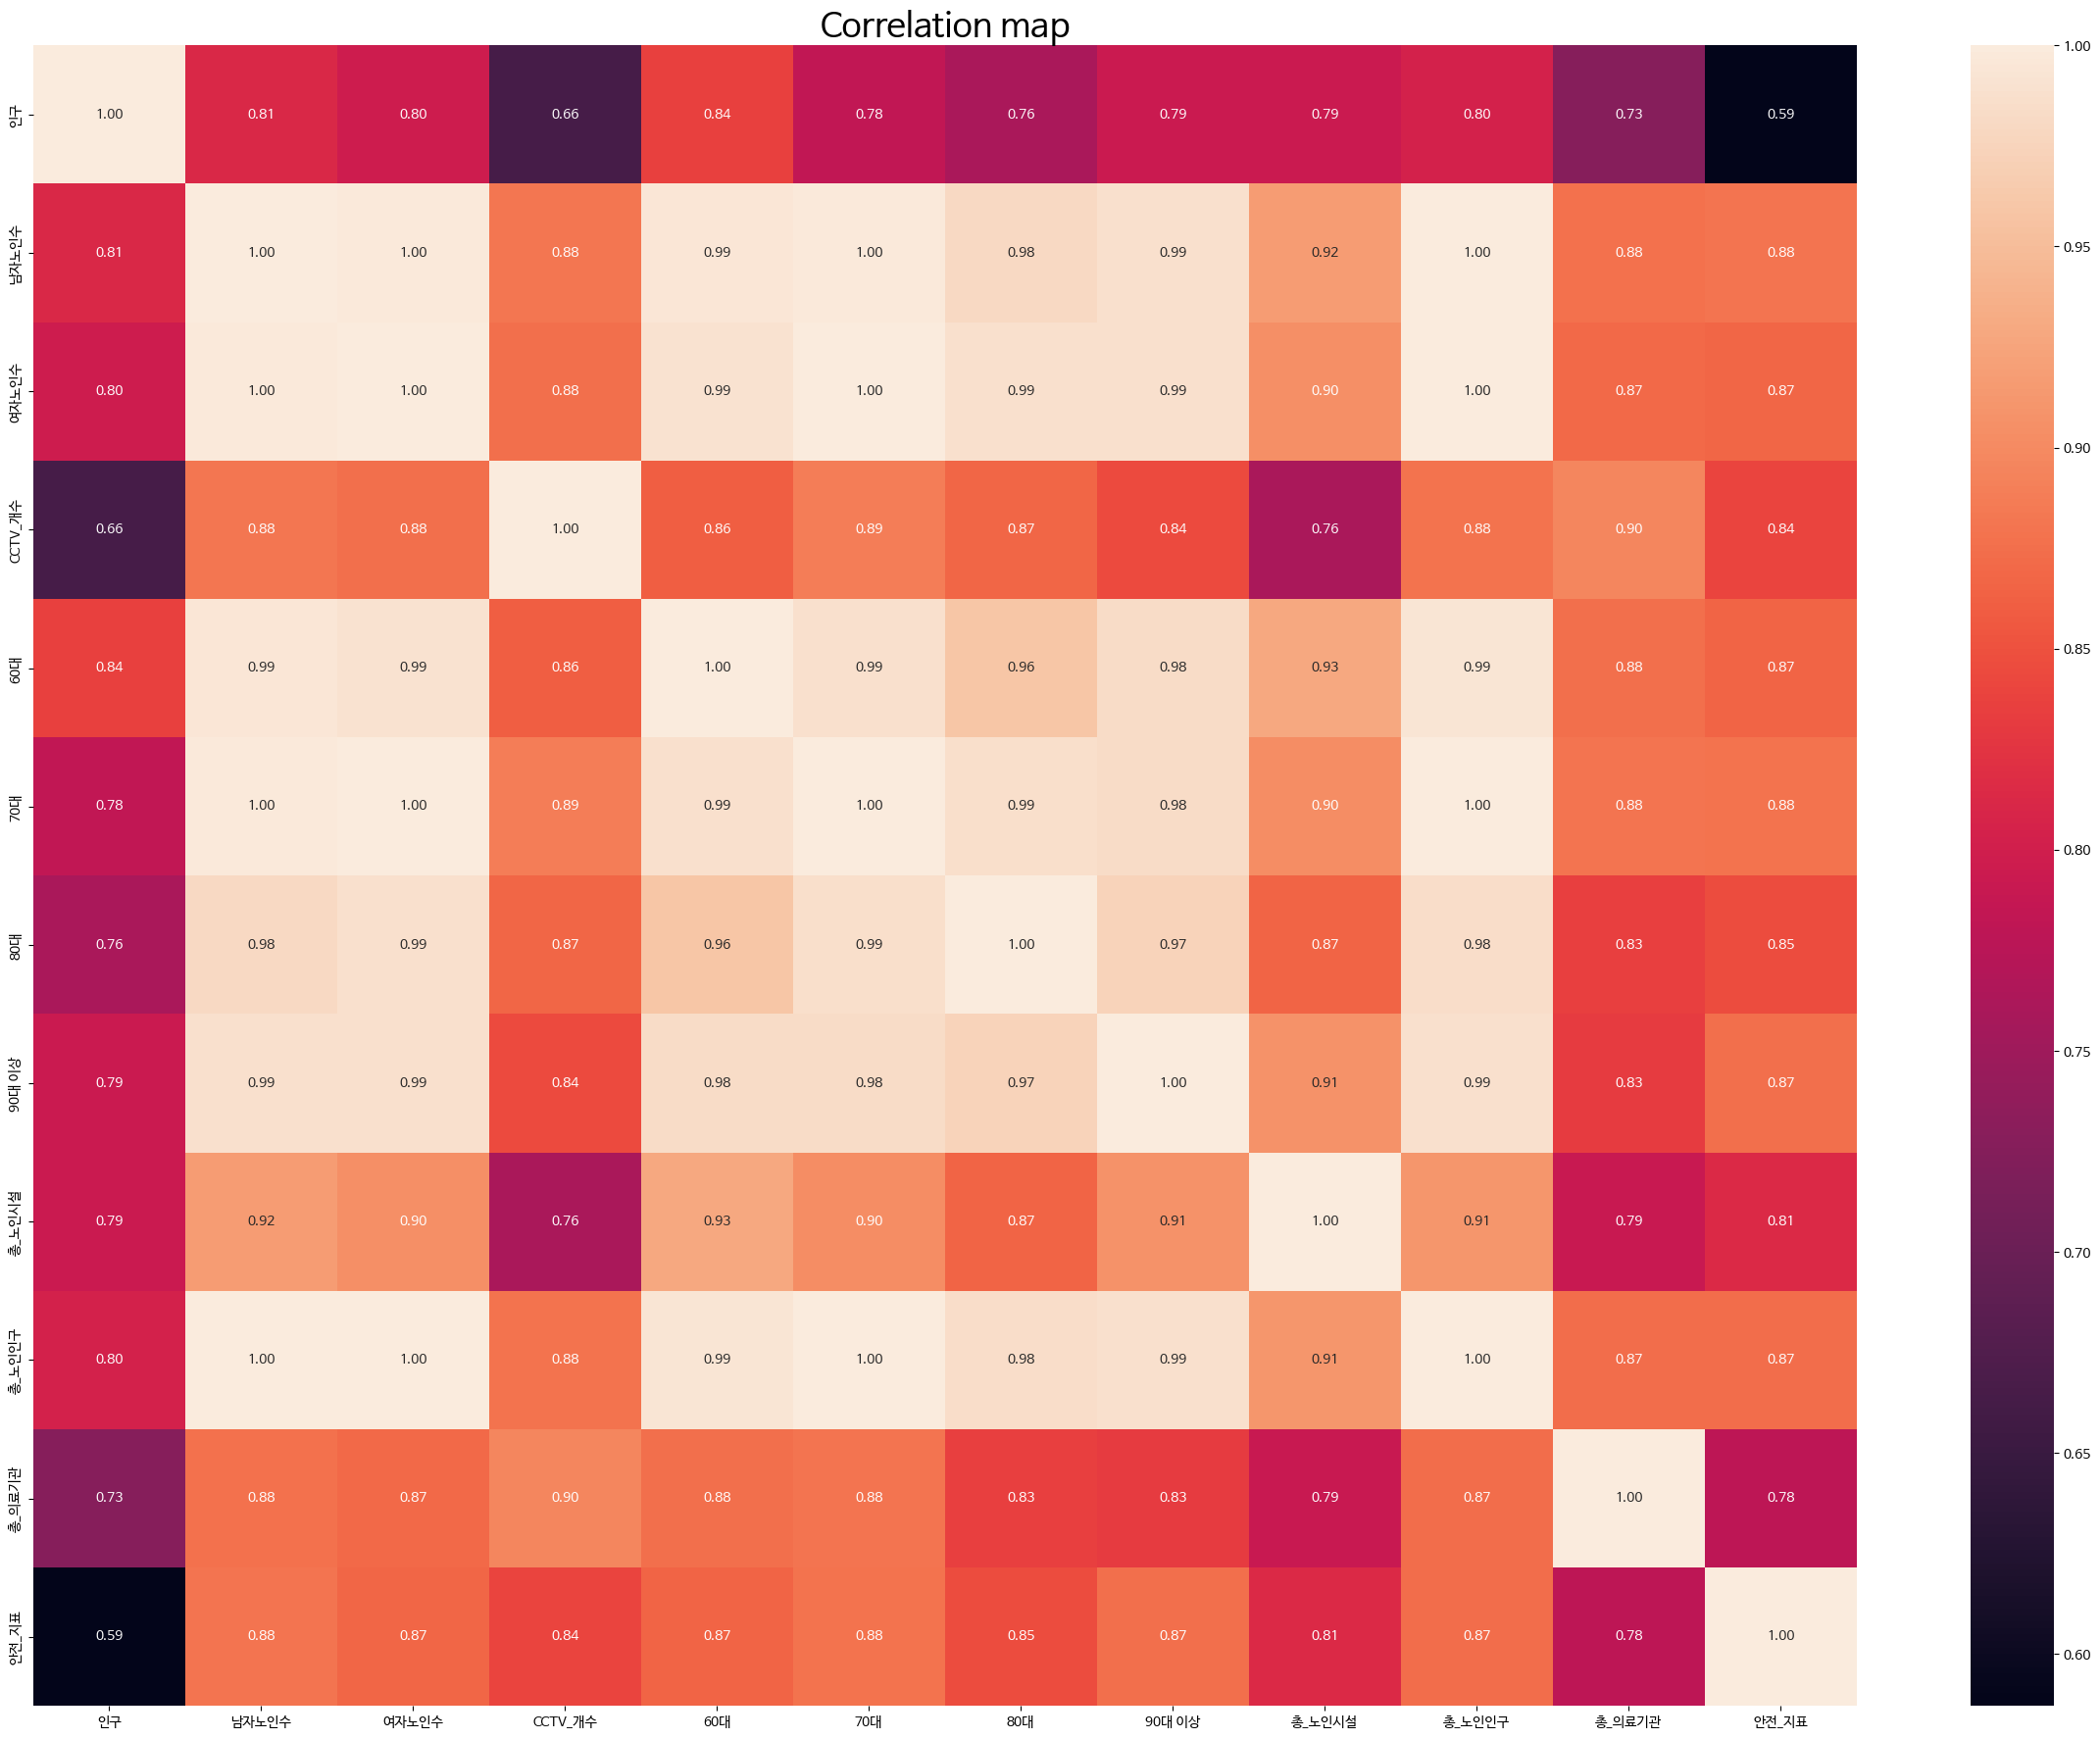

In [ ]:
#변수 간 correlation 확인
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

fig = plt.figure(figsize=(30, 22))

df_x = df.drop(columns=['행정동'])
df_corr = df_x.corr()
sns.heatmap(df_corr, annot=True, fmt='.2f')
plt.title('Correlation map', size=25)

plt.show()

In [ ]:
df.isnull().sum()

행정동        0
인구         0
남자노인수      0
여자노인수      0
CCTV_개수    0
60대        0
70대        0
80대        0
90대 이상     0
총_노인시설     0
총_노인인구     0
총_의료기관     0
안전_지표      0
dtype: int64

## 변수 중요도

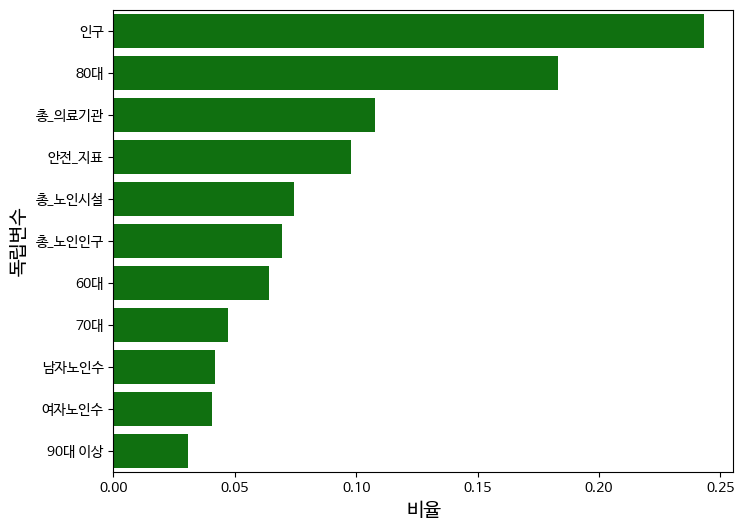

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False


rf = RandomForestRegressor(n_estimators=100, random_state=42)

df_features = df.drop(columns=['행정동','CCTV_개수'])
df_target = df['CCTV_개수']

X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2)
rf.fit(X_train, y_train)

ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index,color='green')

plt.xlabel('비율', fontsize=14)
plt.ylabel('독립변수', fontsize=14)
plt.show()

In [ ]:
## spearman 상관계수
corr_order = df.drop(['행정동'], axis=1).corr(method='spearman')['CCTV_개수'].abs().sort_values(ascending=False).head(11)
print(corr_order)

CCTV_개수    1.000000
60대        0.812200
남자노인수      0.809376
안전_지표      0.805996
70대        0.804293
총_의료기관     0.803561
여자노인수      0.803163
인구         0.802598
총_노인인구     0.800904
80대        0.795256
90대 이상     0.770839
Name: CCTV_개수, dtype: float64


# 2. 변수 선택


## 2.1 단계적 변수 선택법

In [ ]:
df.columns

Index(['행정동', '인구', '남자노인수', '여자노인수', 'CCTV_개수', '60대', '70대', '80대', '90대 이상',
       '총_노인시설', '총_노인인구', '총_의료기관', '안전_지표'],
      dtype='object')

In [ ]:
# 전진 단계별 선택법
variables = ['인구','남자노인수', '여자노인수', '60대', '70대', '80대', '90대 이상',
       '총_노인시설','총_노인인구', '총_의료기관', '안전_지표']   #독립변수 리스트

y = df['CCTV_개수']   #종속변수
selected_variables = []   # 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05

sv_per_step = []   # 각 스텝별로 선택된 변수들
adjusted_r_squared = []   # 각 스텝별 수정된 결정계수
steps = []   # 스텝
step = 0

while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder)   # 변수의 p-value
    # 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 선형 모형을 적합
    for col in remainder:
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]

    min_pval = pval.min()
    if min_pval < sl_enter:   # 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        # 선택된 변수들에 대해 어떤 변수를 제거할지 고름
        while len(selected_variables) > 0:
            selected_X = df[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:]   # 절편항의 p-value는 제외
            max_pval = selected_pval.max()
            if max_pval >= sl_remove:   # 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break

        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [ ]:
selected_variables

['총_의료기관', '안전_지표']

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

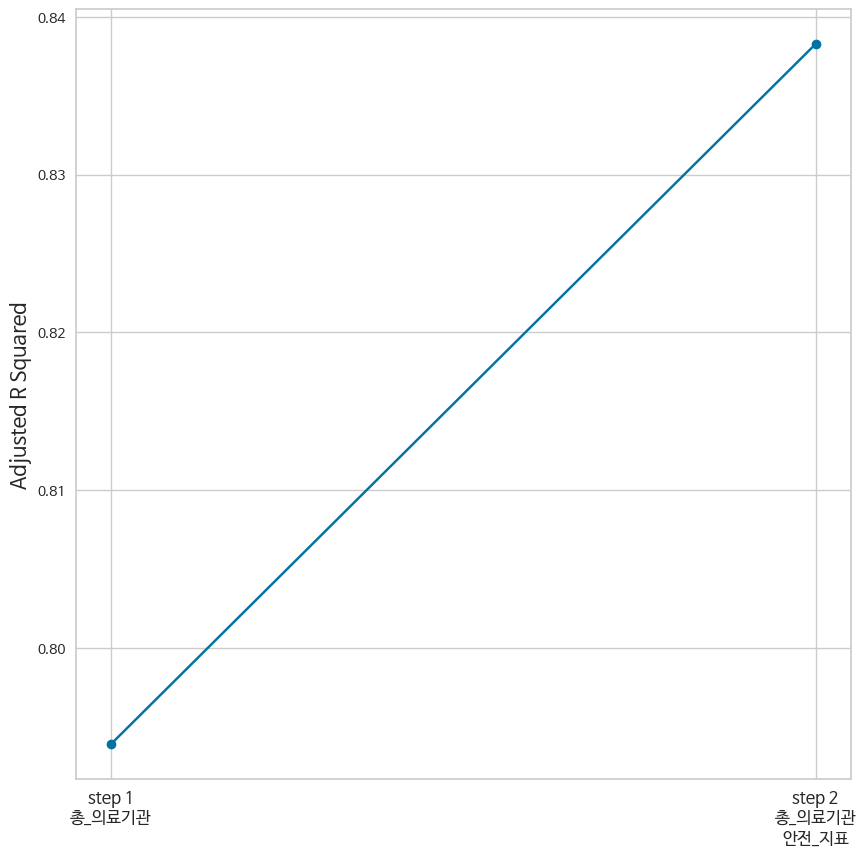

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')

font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')

plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

## 2.2 전진 선택법

In [ ]:
variables = ['인구','남자노인수', '여자노인수', '60대', '70대', '80대', '90대 이상',
       '총_노인시설','총_노인인구', '총_의료기관', '안전_지표']  #독립변수 리스트

y = df['CCTV_개수']   #종속변수
selected_variables = []   # 선택된 변수들
sl_enter = 0.05

sv_per_step = []   # 각 스텝별로 선택된 변수들
adjusted_r_squared = []   # 각 스텝별 수정된 결정계수
steps = []   # 스텝
step = 0

In [ ]:
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder)   # 변수의 p-value
    # 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 선형 모형을 적합
    for col in remainder:
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]

    min_pval = pval.min()
    if min_pval < sl_enter:   # 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())

        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [ ]:
selected_variables

['총_의료기관', '안전_지표']

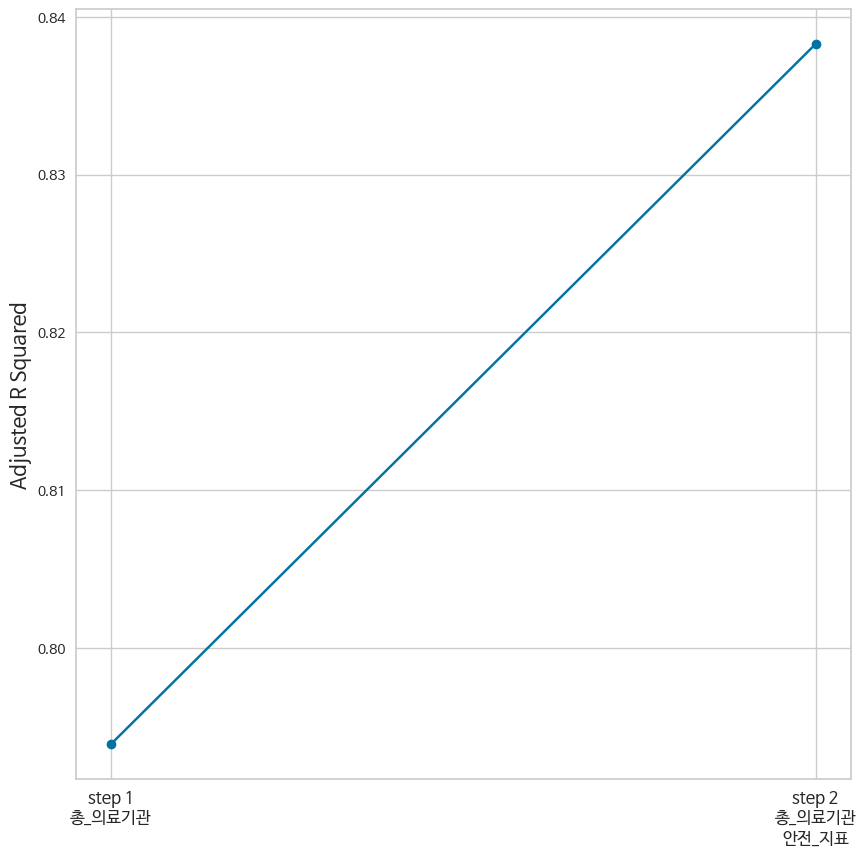

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')

font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')

plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

## 2.3 후진 소거법

In [ ]:
variables = ['인구','남자노인수', '여자노인수', '60대', '70대', '80대', '90대 이상',
       '총_노인시설','총_노인인구', '총_의료기관', '안전_지표']   #독립변수 리스트   #독립변수 리스트

y = df['CCTV_개수']   #종속변수
selected_variables = variables   # 초기에는 모든 변수가 선택된 상태
sl_remove = 0.05

sv_per_step = []   # 각 스텝별로 선택된 변수들
adjusted_r_squared = []   # 각 스텝별 수정된 결정계수
steps = []   # 스텝
step = 0

In [ ]:
while len(selected_variables) > 0:
    X = sm.add_constant(df[selected_variables])
    p_vals = sm.OLS(y,X).fit().pvalues[1:]   # 절편항의 p-value는 제외
    max_pval = p_vals.max()   # 최대 p-value
    if max_pval >= sl_remove:   # 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)

        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [ ]:
selected_variables

['남자노인수', '60대', '총_의료기관']

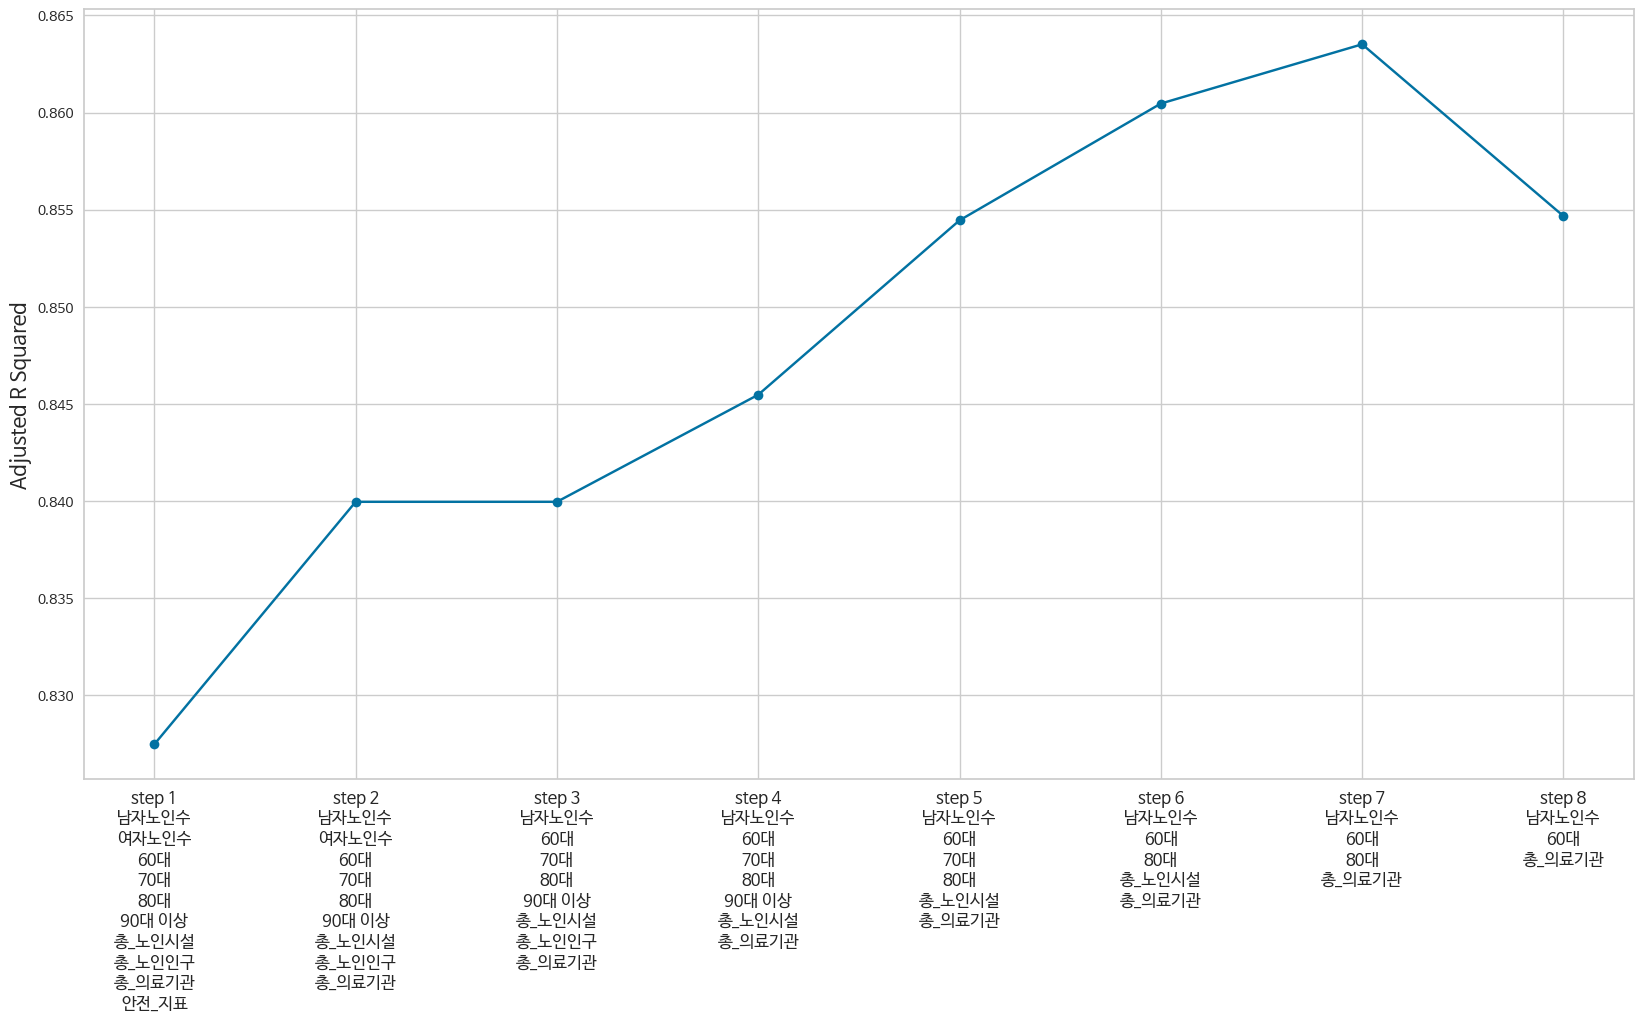

In [ ]:
fig = plt.figure(figsize=(20,10))
fig.set_facecolor('white')

font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')

plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

# 3. 다중회귀 분석

<Figure size 3000x2200 with 0 Axes>

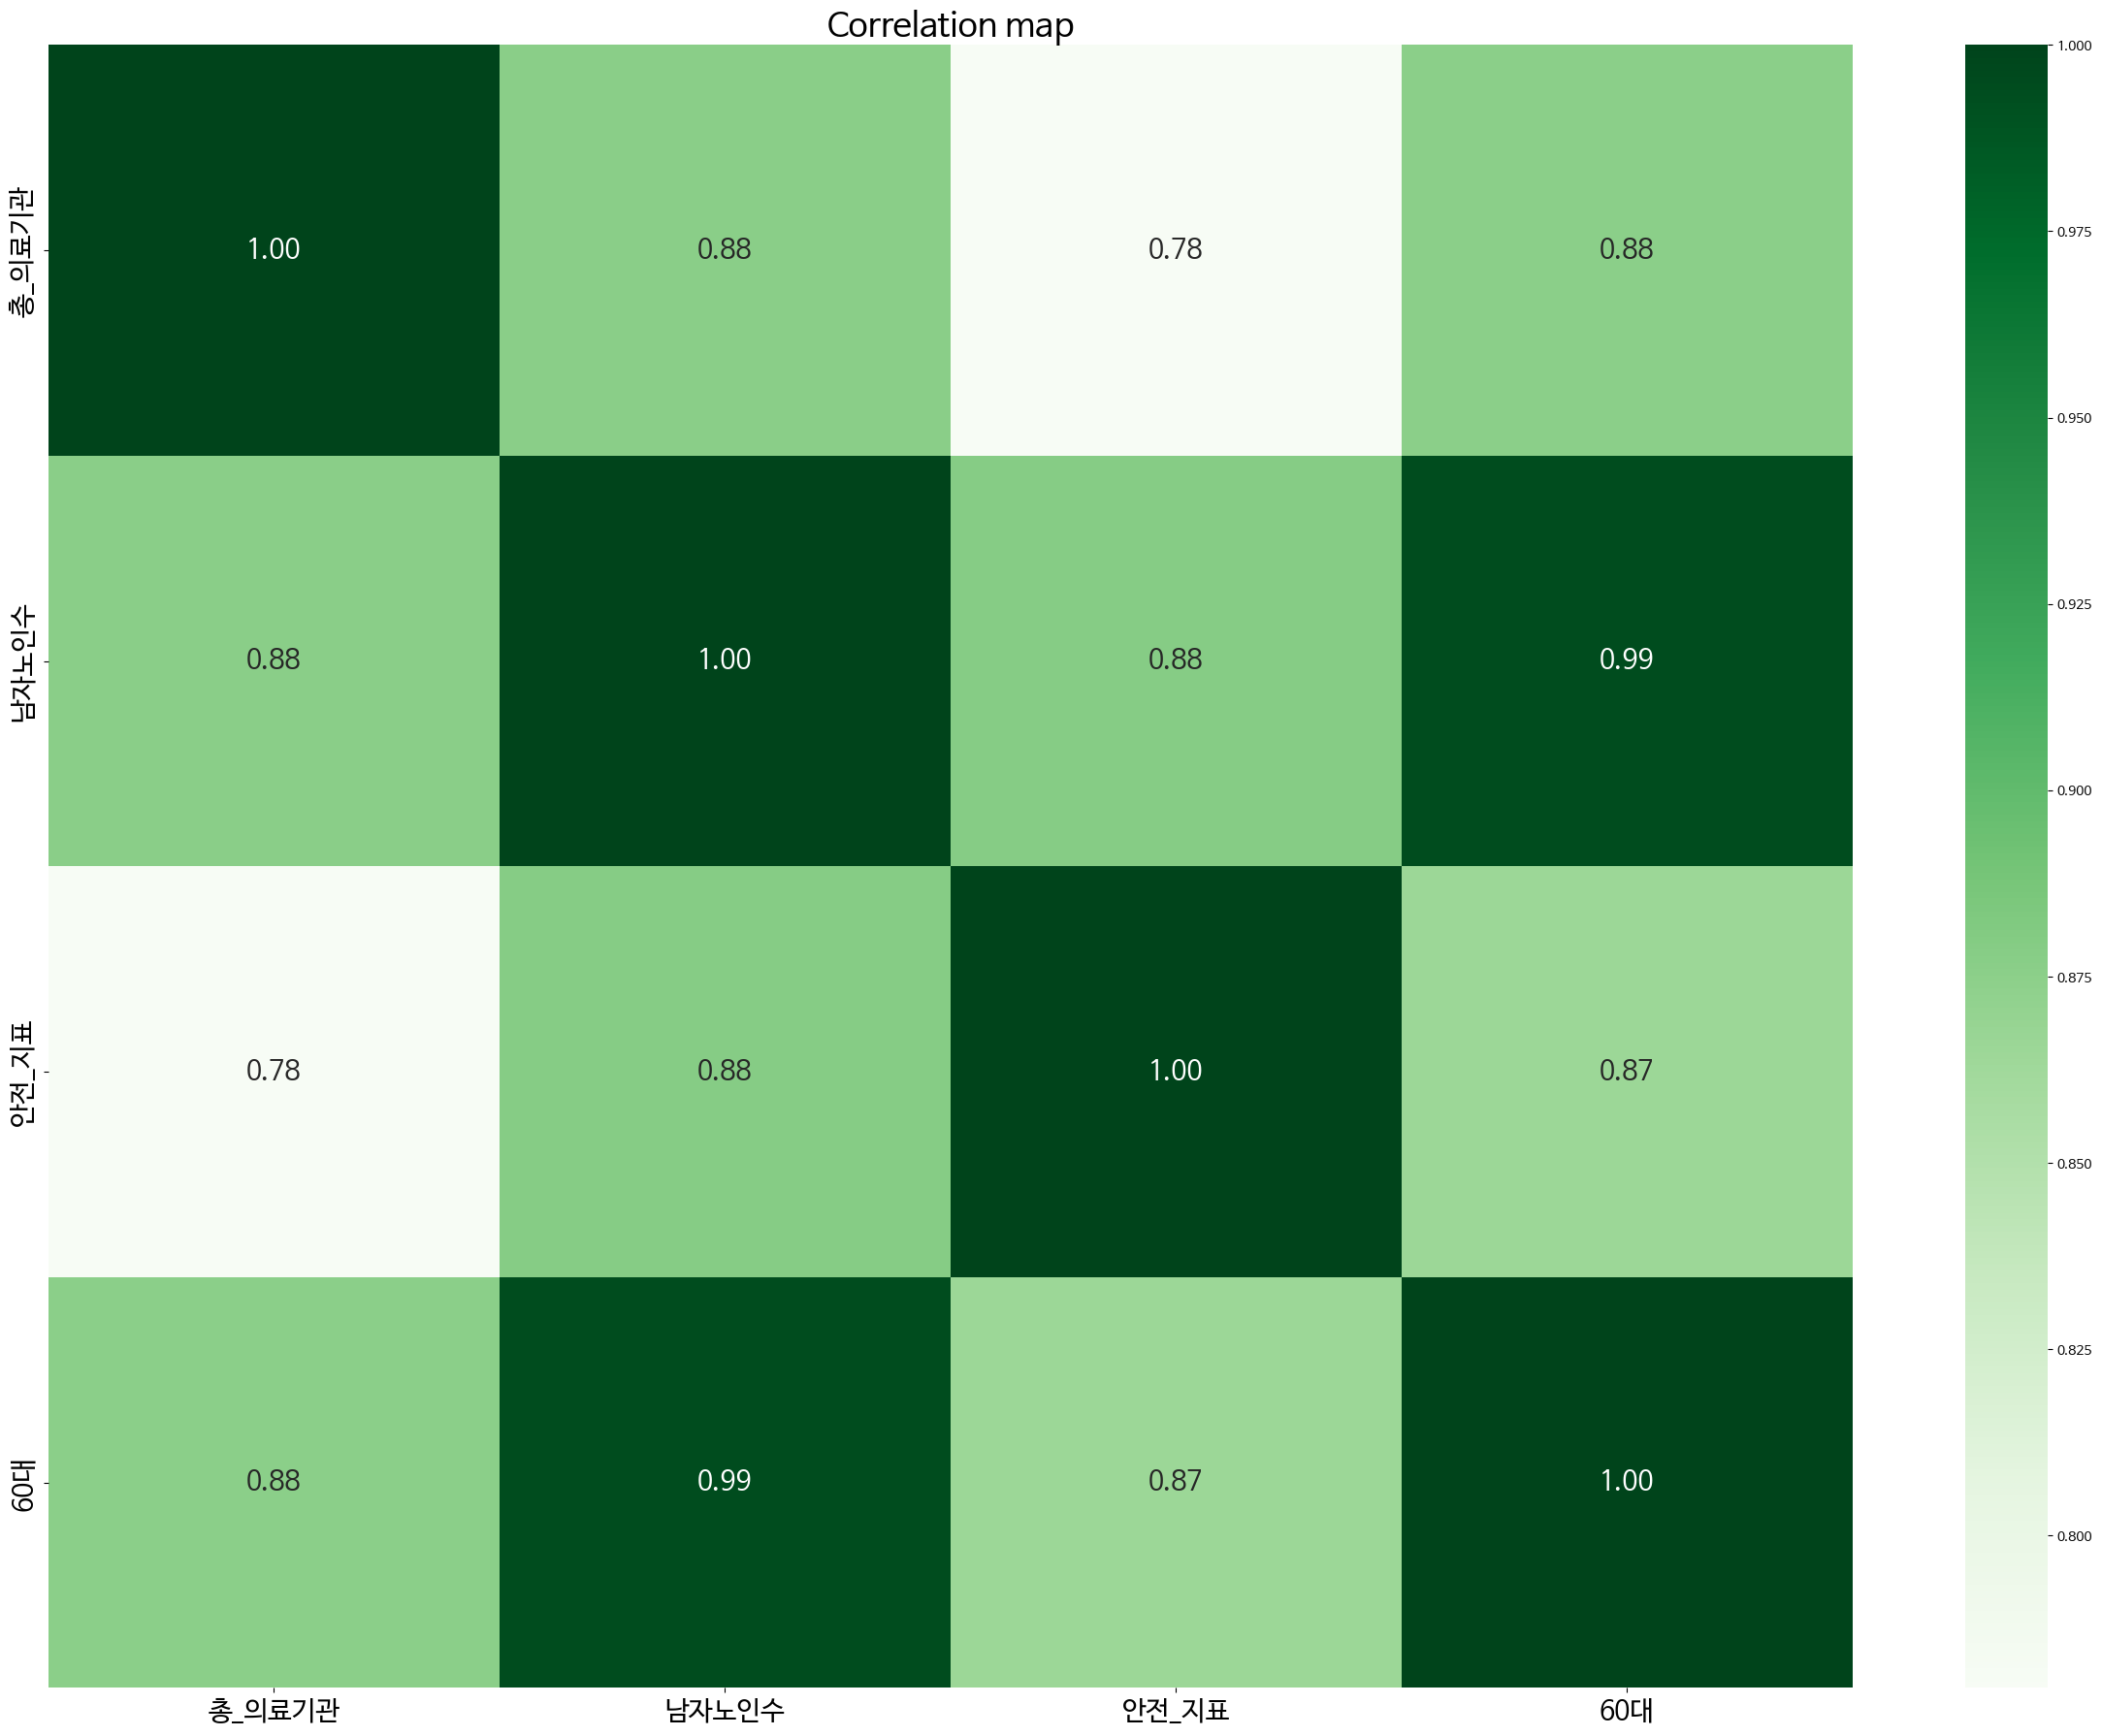

In [ ]:
#변수 간 correlation 확인
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

fig = plt.figure(figsize=(30, 22))

df_x = df[['총_의료기관', '남자노인수','안전_지표','60대']]
df_corr = df_x.corr()
fig = plt.figure(figsize=(30, 22))
heatmap=sns.heatmap(df_corr, annot=True, fmt='.2f', annot_kws={"size": 20}, cmap='Greens')
plt.title('Correlation map', size=25)

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=20)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=20)
plt.show()

In [ ]:
x_data = df[['총_의료기관', '남자노인수','안전_지표','60대']]
target = df[['CCTV_개수']]

multi_model = sm.OLS(target, x_data)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                CCTV_개수   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              104.8
Date:                Fri, 24 May 2024   Prob (F-statistic):                    3.27e-12
Time:                        11:10:52   Log-Likelihood:                         -112.83
No. Observations:                  22   AIC:                                      233.7
Df Residuals:                      18   BIC:                                      238.0
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
총_의료기관         0.8697      0.363      2.393      0.028       0.106       1.633
남자노인수          0.1501      0.058      2.581      0.019       0.028       0.272
안전_지표          3.9618      2.043      1.940      0.068      -0.330       8.253
60대           -0.1583      0.067     -2.367      0.029      -0.299      -0.018
==============================================================================
Omnibus:                       11.631   Durbin-Watson:                   1.581
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                9.641
Skew:                           1.333   Prob(JB):                      0.00806
Kurtosis:                       4.846   Cond. No.                         755.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
dff = df[['총_의료기관', '남자노인수','안전_지표','60대','CCTV_개수']]
dff.describe()

,총_의료기관,남자노인수,안전_지표,60대,CCTV_개수
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,48.772727,2232.863636,15.045455,1735.227273,172.045455
std,54.625070,1699.636776,9.514286,1412.002392,106.932323
min,4.000000,606.000000,1.000000,410.000000,58.000000
25%,14.750000,1102.500000,10.000000,860.500000,82.500000
50%,29.500000,1506.500000,11.000000,1083.500000,169.000000
75%,61.250000,2467.000000,21.000000,1964.500000,215.000000
max,237.000000,6697.000000,42.000000,5493.000000,505.000000


In [ ]:
x = df[['총_의료기관', '남자노인수','안전_지표','60대']].values
y = df[['CCTV_개수']]

In [ ]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
features=['총_의료기관', '남자노인수','안전_지표','60대']
pd.DataFrame(x,columns=features)

,총_의료기관,남자노인수,안전_지표,60대
0,-0.126903,-0.266093,0.317846,-0.370579
1,-0.389227,-0.516611,-0.435204,-0.614138
2,-0.126903,-0.532269,-0.435204,-0.543825
3,-0.801450,-0.810488,-0.542782,-0.790284
4,0.022996,1.217744,1.716366,1.326366
5,-0.707763,-0.684025,-0.435204,-0.640234
6,0.772493,0.142203,-0.435204,0.177431
7,1.447039,1.288202,0.748160,1.451770
8,-0.595339,-0.557561,-1.510989,-0.503232
9,-0.801450,-0.947791,-0.542782,-0.937435


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)   # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1'])

principalDf.head()

,principal component1
0,-0.235621
1,-0.981708
2,-0.826420
3,-1.475915
4,2.152004


In [ ]:
principalDf['행정동']=df['행정동']
principalDf['CCTV_개수']=df['CCTV_개수']
principalDf

,principal component1,행정동,CCTV_개수
0,-0.235621,금암동,140
1,-0.981708,노송동,177
2,-0.826420,덕진동,196
3,-1.475915,동서학동,71
4,2.152004,삼천동,238
5,-1.236014,서서학동,74
6,0.328691,서신동,176
7,2.475021,송천동,237
8,-1.566280,여의동,81
9,-1.622434,완산동,134


In [ ]:
principalDf.columns=['pca_x', '행정동', 'CCTV_개수']
x = principalDf['pca_x']
y = principalDf['CCTV_개수']

from sklearn.linear_model import LinearRegression
line_fitter = LinearRegression()
line_fitter.fit(x.values.reshape(-1,1), y)

LinearRegression()

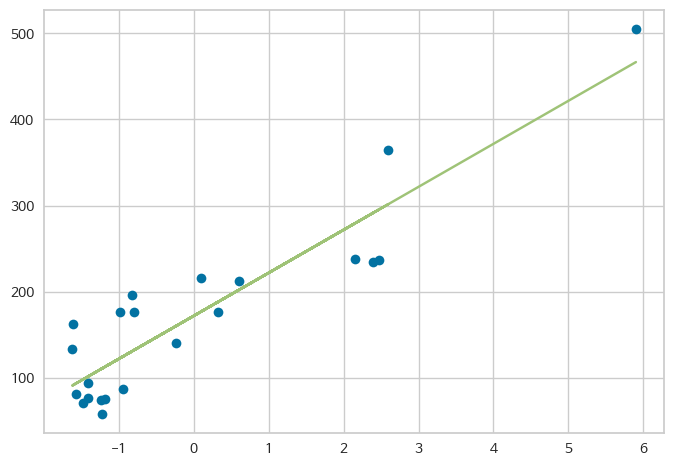

In [ ]:
plt.plot(x, y, 'o')
plt.plot(x,line_fitter.predict(x.values.reshape(-1,1)))
plt.show()

In [ ]:
#예측값 빼기 - 원래값 > 0 : 회귀식 아래쪽
#회귀식 아래쪽 의원, 80대 : 의원과 80대에 비해 CCTV 개수가 작다
ff = pd.DataFrame(line_fitter.predict(x.values.reshape(-1,1))-y)
ff['행정동']=df['행정동']
ff

,CCTV_개수,행정동
0,20.283812,금암동
1,-53.958979,노송동
2,-65.207384,덕진동
3,27.371434,동서학동
4,41.468191,삼천동
5,36.346678,서서학동
6,12.452874,서신동
7,58.592374,송천동
8,12.860607,여의동
9,-42.942442,완산동


In [ ]:
f1 = ff[ff['CCTV_개수']>0]
f1

,CCTV_개수,행정동
0,20.283812,금암동
3,27.371434,동서학동
4,41.468191,삼천동
5,36.346678,서서학동
6,12.452874,서신동
7,58.592374,송천동
8,12.860607,여의동
12,53.029591,조촌동
13,37.617287,중앙동
16,24.484066,팔복동


In [ ]:
f1.describe()

,CCTV_개수
count,13.000000
mean,32.898976
std,17.178950
min,7.433792
25%,20.283812
50%,36.346678
75%,41.468191
max,58.592374


In [ ]:
f2 = f1[f1['CCTV_개수']>41]['행정동'].tolist()
print('최종 후보 동 : {}'.format(f2))

최종 후보 동 : ['삼천동', '송천동', '조촌동', '평화동']


## 후보 동 시각화

In [1]:
import pandas as pd
df_full = pd.read_csv('/content/drive/MyDrive/전주시 공모전/데이터/finla_data_22동_최종.csv')
df_full = df_full
df_full = df_full.sort_values(by=['인구'], axis=0)


In [4]:
df_full.columns

Index(['실제 행정동', '행정동', '인구', '합계원표', '남자노인수', '여자노인수', '범죄신고비율', '남자노인수비율',
       '여자노인수비율', '경로당', '노인복지시설', '병원', '의원', '경찰서', '보안등', 'CCTV_개수', '60대',
       '70대', '80대', '90대 이상', '총_노인시설', '총_노인인구', '총_의료기관', '안전_지표'],
      dtype='object')

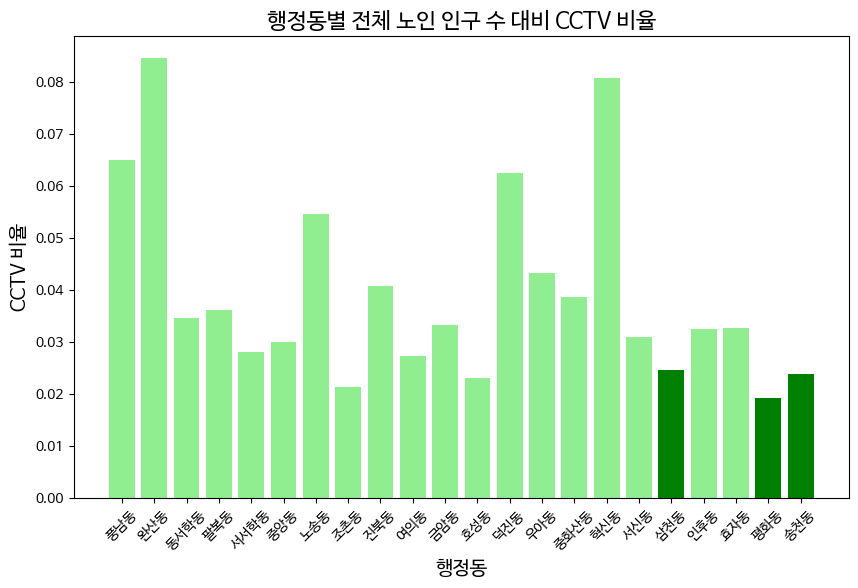

In [9]:
# 막대 그래프 생성
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

highlighted_dongs = ['삼천동', '송천동', '평화동']
# 색상 리스트 생성
colors = ['green' if dong in highlighted_dongs else 'lightgreen' for dong in df_full['행정동']]

plt.figure(figsize=(10, 6))
plt.bar(df_full['행정동'], df_full['CCTV_개수']/(df_full['남자노인수']+df_full['여자노인수']), color=colors)

# 제목 및 축 레이블 설정
plt.title('행정동별 전체 노인 인구 수 대비 CCTV 비율', fontsize=16)
plt.xlabel('행정동', fontsize=14)
plt.ylabel('CCTV 비율', fontsize=14)

# 레이블 회전 (필요한 경우)
plt.xticks(rotation=45)

# 그래프 표시
plt.show()

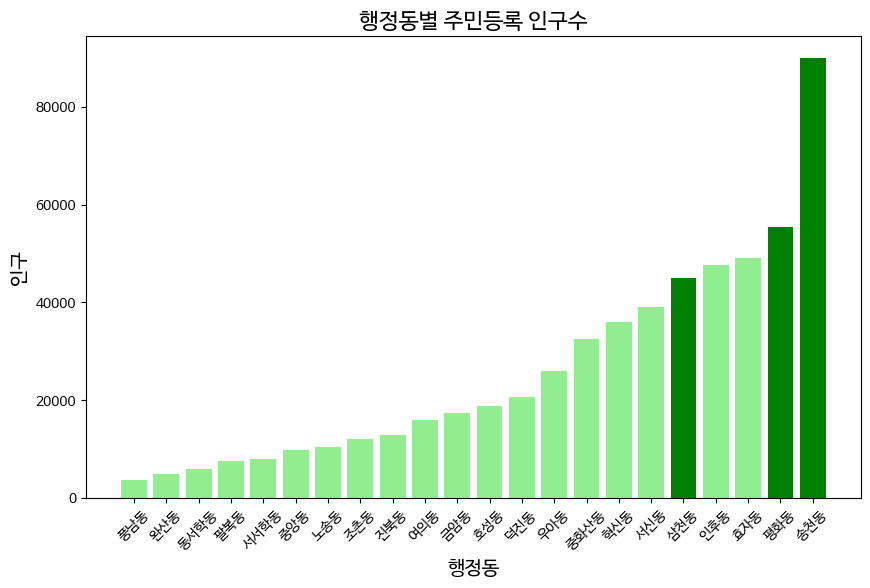

In [2]:
# 막대 그래프 생성
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

highlighted_dongs = ['삼천동', '송천동', '평화동']
# 색상 리스트 생성
colors = ['green' if dong in highlighted_dongs else 'lightgreen' for dong in df_full['행정동']]

plt.figure(figsize=(10, 6))
plt.bar(df_full['행정동'], df_full['인구'], color=colors)

# 제목 및 축 레이블 설정
plt.title('행정동별 주민등록 인구수', fontsize=16)
plt.xlabel('행정동', fontsize=14)
plt.ylabel('인구', fontsize=14)

# 레이블 회전 (필요한 경우)
plt.xticks(rotation=45)

# 그래프 표시
plt.show()

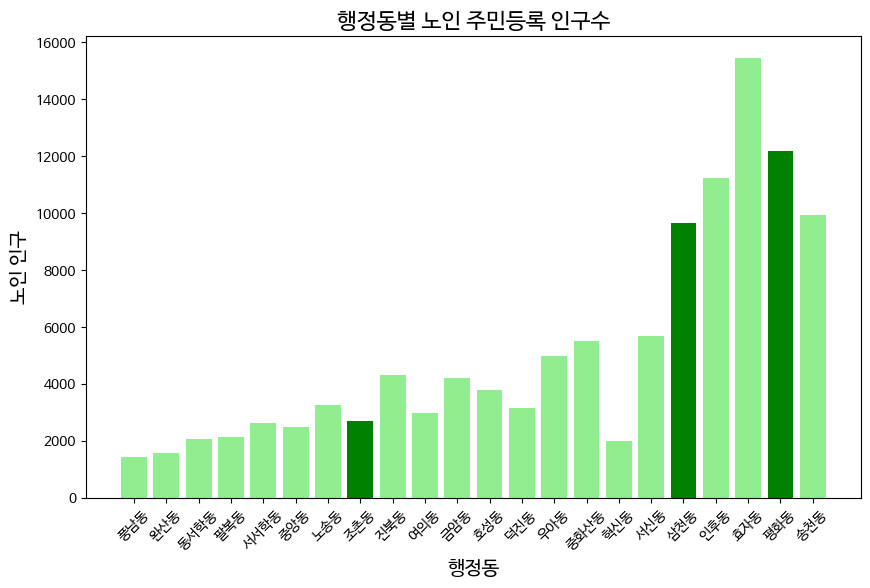

In [3]:
# 막대 그래프 생성
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

highlighted_dongs = ['삼천동', '조촌동', '평화동']
# 색상 리스트 생성
colors = ['green' if dong in highlighted_dongs else 'lightgreen' for dong in df_full['행정동']]

plt.figure(figsize=(10, 6))
plt.bar(df_full['행정동'], df_full['남자노인수']+df_full['여자노인수'], color=colors)

# 제목 및 축 레이블 설정
plt.title('행정동별 노인 주민등록 인구수', fontsize=16)
plt.xlabel('행정동', fontsize=14)
plt.ylabel('노인 인구', fontsize=14)

# 레이블 회전 (필요한 경우)
plt.xticks(rotation=45)

# 그래프 표시
plt.show()

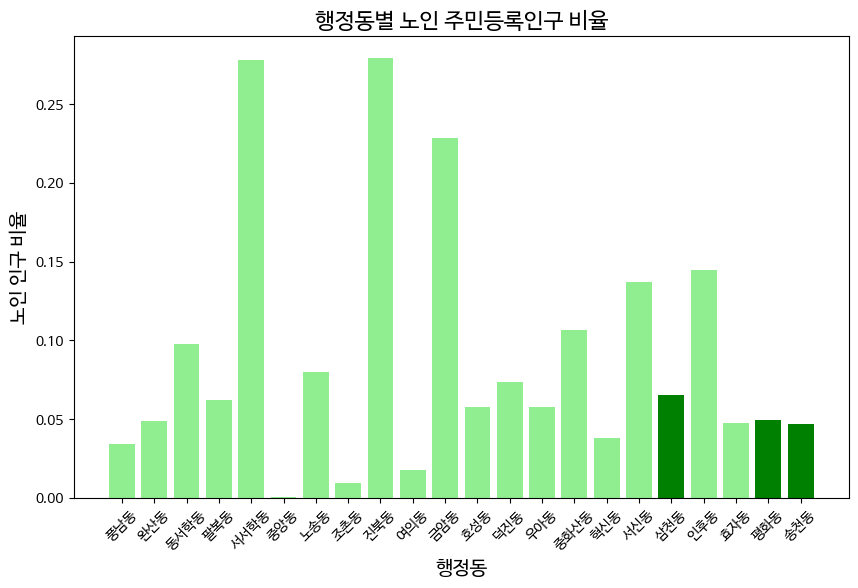

In [4]:
# 막대 그래프 생성
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

highlighted_dongs = ['삼천동', '송천동', '평화동']
# 색상 리스트 생성
colors = ['green' if dong in highlighted_dongs else 'lightgreen' for dong in df_full['행정동']]

plt.figure(figsize=(10, 6))
plt.bar(df_full['행정동'], df_full['남자노인수비율']+df_full['여자노인수비율'], color=colors)

# 제목 및 축 레이블 설정
plt.title('행정동별 노인 주민등록인구 비율', fontsize=16)
plt.xlabel('행정동', fontsize=14)
plt.ylabel('노인 인구 비율', fontsize=14)

# 레이블 회전 (필요한 경우)
plt.xticks(rotation=45)

# 그래프 표시
plt.show()

# 오픈 API 호출

In [ ]:
import requests
import pandas as pd
import xml.etree.ElementTree as ET

#여의동, 혁신동, 효자5동

# API URL 및 파라미터 설정
url = 'http://openapi.jeonju.go.kr/rest/saftylight/getSaftylight'
params = {
    'serviceKey': '1dAjp7gYvh1YhN7RhoXCGxBHAT5MSbP1FcogMS0I2iRWIMvx5zdLO9yPH6Yno9dyYXVBK/X7NmfxLxTVT03PMQ==',
    'authApiKey': '',
    'startPage': '1',
    'pageSize': '',
    'gu': '',
    'hDong': '효자4동',
    'bDong': '',
    'newAddr': '',
    'kepcoCustom': ''
}

# API 요청
response = requests.get(url, params=params)

# XML 응답 파싱
root = ET.fromstring(response.content)

# XML 데이터에서 필요한 정보 추출
data = []
for item in root.findall('.//list'):
    entry = {
        'HDong': item.findtext('HDong'),
        'BDong': item.findtext('BDong'),
        'BPoleNum': item.findtext('BPoleNum'),
        'baseDate': item.findtext('baseDate'),
        'posx' : item.findtext('posx'),
        'posy' : item.findtext('posy')
    }

    data.append(entry)

# 데이터프레임 생성
df_light_empty = pd.DataFrame(data)

# 데이터프레임 출력
print(df_light_empty.head())


  HDong BDong BPoleNum    baseDate         posx        posy
0  효자4동   상림동           2018-01-22  127.0749901  35.8146116
1  효자4동   상림동           2018-01-22  127.0749901  35.8146116
2  효자4동   상림동           2018-01-22  127.0749901  35.8146116
3  효자4동   상림동           2018-01-22  127.0749901  35.8146116
4  효자4동   상림동           2018-01-22  127.0749901  35.8146116


In [ ]:
import requests
import pandas as pd
import xml.etree.ElementTree as ET

# 행정동 이름 리스트
hang_name = ['진북동', '인후1동', '인후2동', '인후3동', '덕진동', '금암1동', '금암2동', '팔복동', '우아1동', '우아2동', '호성동', '송천1동', '송천2동', '조촌동', '여의동', '혁신동',
 '중앙동', '풍남동', '노송동', '완산동', '동서학동', '서서학동', '중화산1동', '중화산2동', '서신동', '평화1동', '평화2동', '삼천1동', '삼천2동', '삼천3동', '효자1동', '효자2동', '효자3동', '효자4동', '효자5동']

# API URL 및 고정 파라미터 설정
url = 'http://openapi.jeonju.go.kr/rest/saftylight/getSaftylight'
params = {
    'serviceKey': '1dAjp7gYvh1YhN7RhoXCGxBHAT5MSbP1FcogMS0I2iRWIMvx5zdLO9yPH6Yno9dyYXVBK/X7NmfxLxTVT03PMQ==',
    'authApiKey': '',
    'startPage': '1',
    'pageSize': '',
    'gu': '',
    'hDong': '',
    'bDong': '',
    'newAddr': '',
    'kepcoCustom': ''
}

# 전체 데이터를 저장할 리스트
all_data = []

# 각 행정동에 대해 API 호출 및 데이터 추출
for dong in hang_name:
    params['hDong'] = dong
    response = requests.get(url, params=params)

    if response.status_code == 200:
        root = ET.fromstring(response.content)

        for item in root.findall('.//list'):
            entry = {
                'HDong': item.findtext('HDong'),
                'BDong': item.findtext('BDong'),
                'BPoleNum': item.findtext('BPoleNum'),
                'baseDate': item.findtext('baseDate'),
                'posx' : item.findtext('posx'),
                'posy' : item.findtext('posy')
            }
            all_data.append(entry)
    else:
        print(f"Failed to get data for {dong}. Status code: {response.status_code}")

# 데이터프레임 생성
df_light = pd.DataFrame(all_data)

# 데이터프레임 출력
print(df_light)

    HDong BDong BPoleNum    baseDate                posx                posy
0     진북동   진북동           2018-01-22  127.12945973070923   35.82536865682164
1     진북동   진북동           2018-01-22  127.14604751691875  35.830851830608374
2     진북동   진북동           2018-01-22  127.13624063279934  35.831757846176494
3     진북동   진북동           2018-01-22  127.13020351344637   35.82848395668338
4     진북동   진북동           2018-01-22         127.1364621           35.830853
..    ...   ...      ...         ...                 ...                 ...
307  효자4동   상림동           2018-01-22         127.0749901          35.8146116
308  효자4동   상림동           2018-01-22         127.0813887          35.8265264
309  효자4동   상림동           2018-01-22          127.074782           35.816187
310  효자4동   상림동           2018-01-22          127.076671           35.818365
311  효자4동   상림동           2018-01-22           127.07861           35.819109

[312 rows x 6 columns]


In [ ]:
df_light.to_csv('/content/drive/MyDrive/전주시 공모전/데이터/전주시_보안등_최종.csv', index=False)

In [ ]:
a = df_light['HDong'].unique()
print(a)

['진북동' '인후1동' '인후2동' '인후3동' '덕진동' '금암1동' '금암2동' '팔복동' '우아1동' '우아2동' '호성동'
 '송천1동' '송천2동' '조촌동' '중앙동' '풍남동' '노송동' '완산동' '동서학동' '서서학동' '중화산1동' '중화산2동'
 '서신동' '평화1동' '평화2동' '삼천1동' '삼천2동' '삼천3동' '효자1동' '효자2동' '효자3동' '효자4동']


In [ ]:
len(hang_name)

35

In [ ]:
for i in hang_name :
  if i not in a:
    print(i)

여의동
혁신동
효자5동


In [ ]:
similar_dong_mapping = {
    '중화산1동': '중화산동',
    '중화산2동': '중화산동',
    '효자1동': '효자동',
    '효자2동': '효자동',
    '효자3동': '효자동',
    '효자4동': '효자동',
    '효자5동': '효자동',
    '금암1동': '금암동',
    '금암2동': '금암동',
    '우아1동': '우아동',
    '우아2동': '우아동',
    '인후1동': '인후동',
    '인후2동': '인후동',
    '인후3동': '인후동',
    '삼천1동': '삼천동',
    '삼천2동': '삼천동',
    '삼천3동': '삼천동',
    '평화1동': '평화동',
    '평화2동': '평화동',
    '송천1동': '송천동',
    '송천2동': '송천동',
    '다가동' : '중앙동',
    '고사동' : '중앙동',
    '태평동' : '중앙동',
    '경원동' : '풍남동',
    '전동' : '풍남동',
    '교동' : '풍남동',
    '중노송동' : '노송동',
    '남노송동' : '노송동',
    '서노송동' : '노송동',
    '동완산동' : '완산동',
    '서완산' : '완산동',
    '대성동' : '동서학동',
    '색장동' : '동서학동',
    '석구동' : '평화동',
    '원당동' : '평화동',
    '중인동' : '삼천동',
    '중인동' : '삼천동',
    '용복동' : '삼천동',
    '상림동' : '효자동',
    #덕진구
    '산정동' : '우아동',
    '금상동' : '우아동',
    '전미동' : '송천동',
    '반월동' : '조촌동',
    '화전동' : '조촌동',
    '용정동' : '조촌동',
    '성덕동' : '조촌동',
    '원동' : '조촌동',
    '도도동' : '조촌동',
    '강흥동' : '조촌동',
    '도덕동' : '조촌동',
    '남동' : '조촌동',
    '고랑동' : '여의동',
    '만성동' : '혁신동',
    '장동' : '혁신동',
    '중동' : '혁신동',
}
# 유사한 행정동명 매핑
# 읍면동명을 유사한 이름으로 변경
df_light['행정동'] = df_light['HDong'].replace(similar_dong_mapping)


# 남자노인수와 여자노인수를 그룹화하여 합계 계산 (여기서는 단순히 카운트 합계로 가정)
result_df_light = df_light.groupby('행정동').size().reset_index(name='count')

# 결과 출력
result_df_light

,행정동,count
0,금암동,18
1,노송동,10
2,덕진동,10
3,동서학동,10
4,삼천동,30
5,서서학동,10
6,서신동,10
7,송천동,20
8,완산동,10
9,우아동,20


# 클러스터링

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

import warnings
warnings.filterwarnings('ignore')

In [ ]:
hjd_df =  pd.read_csv('/content/drive/MyDrive/전주시 공모전/데이터/finla_data_22동_최종.csv')
hjd_df = hjd_df.iloc[:, [1,2,4,5,7,8,15,16,17,18,19,20,21,22,23]]
hjd_df.head()

,행정동,인구,남자노인수,여자노인수,남자노인수비율,여자노인수비율,CCTV_개수,60대,70대,80대,90대 이상,총_노인시설,총_노인인구,총_의료기관,안전_지표
0,금암동,17432,1791,2419,0.097131,0.131189,140,1224,1846,1003,135,14,4210,42,18
1,노송동,10457,1375,1869,0.033903,0.046083,177,888,1402,819,130,22,3244,28,11
2,덕진동,20590,1349,1793,0.031689,0.042119,196,985,1362,711,83,26,3142,42,11
3,동서학동,5847,887,1163,0.042377,0.055564,71,645,843,489,72,22,2050,6,10
4,삼천동,44894,4255,5407,0.028624,0.036373,238,3565,3879,1873,334,60,9662,50,31


In [ ]:
# 결측값 확인
hjd_df.isnull().sum()

행정동        0
인구         0
남자노인수      0
여자노인수      0
남자노인수비율    0
여자노인수비율    0
CCTV_개수    0
60대        0
70대        0
80대        0
90대 이상     0
총_노인시설     0
총_노인인구     0
총_의료기관     0
안전_지표      0
dtype: int64

In [ ]:
# target 행정동 지정
#인구 = 유동인구 의미
hjd_df['target'] = 0
target_d = ['삼천동', '송천동', '조촌동', '평화동']
for i in range(0,len(target_d)):
    hjd_df.loc[hjd_df['행정동'] == target_d[i],'target'] = 1
hjd_df[hjd_df['target'] == 1]

,행정동,인구,남자노인수,여자노인수,남자노인수비율,여자노인수비율,CCTV_개수,60대,70대,80대,90대 이상,총_노인시설,총_노인인구,총_의료기관,안전_지표,target
4,삼천동,44894,4255,5407,0.028624,0.036373,238,3565,3879,1873,334,60,9662,50,31,1
7,송천동,90039,4372,5549,0.020743,0.026327,237,3738,4019,1842,318,70,9921,126,22,1
12,조촌동,12064,1180,1533,0.004204,0.005462,58,886,1121,607,97,36,2713,14,10,1
17,평화동,55366,5105,7060,0.020679,0.028598,234,4152,5087,2521,397,51,12165,81,21,1


In [ ]:
hjd_df_plot = hjd_df[['인구','남자노인수','여자노인수','총_노인시설','총_노인인구','총_의료기관','안전_지표']]

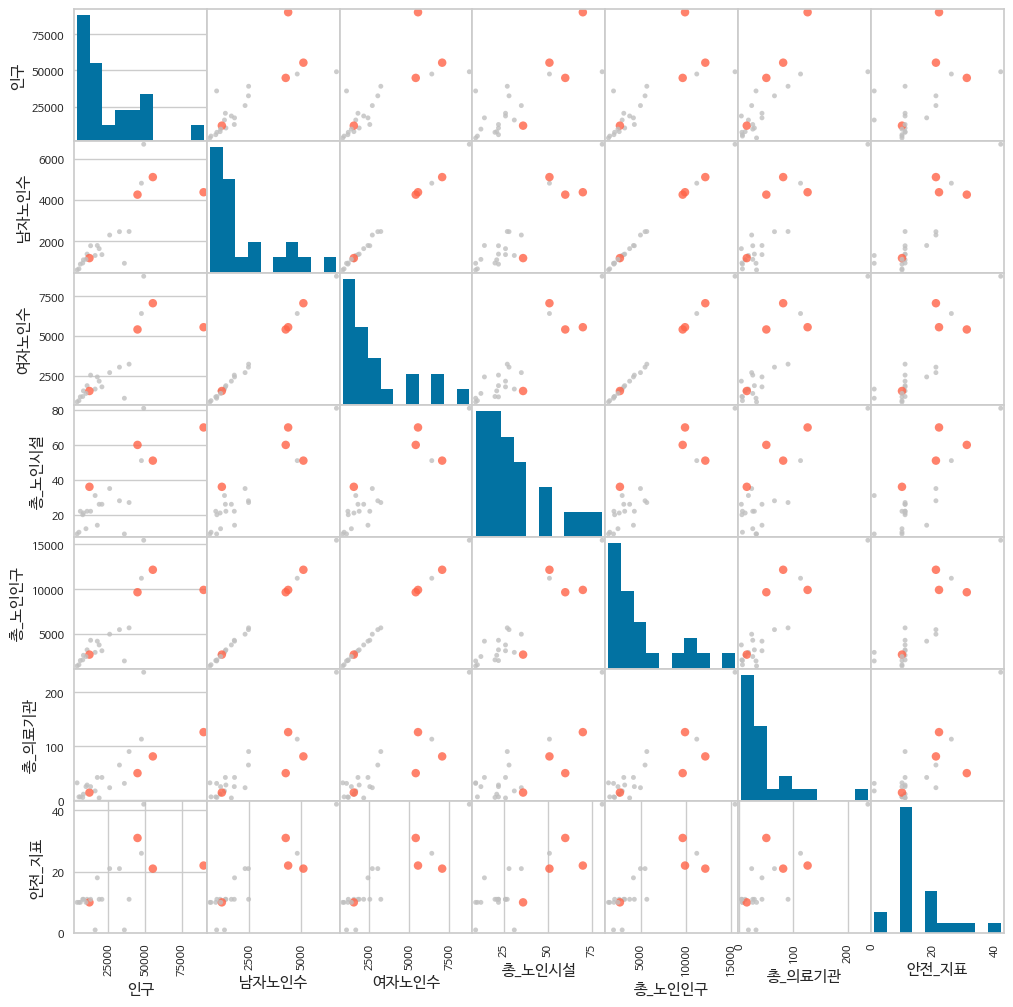

In [ ]:
# 데이터 분포 확인
color_wheel = {1: "silver",
               2: "tomato"}
colors = hjd_df["target"].map(lambda x: color_wheel.get(x + 1))
ax = pd.plotting.scatter_matrix(hjd_df_plot, color=colors, alpha=0.8, s=(hjd_df['target']+0.5)*100, figsize=(12, 12), diagonal='hist')
plt.grid(False)

In [ ]:
hjd_df_cor = hjd_df[['인구','남자노인수','여자노인수','총_노인시설','총_노인인구','총_의료기관','안전_지표']]
corr1 = hjd_df_cor.corr(method='spearman')
corr1


,인구,남자노인수,여자노인수,총_노인시설,총_노인인구,총_의료기관,안전_지표
인구,1.000000,0.879164,0.857708,0.748516,0.861095,0.770274,0.690741
남자노인수,0.879164,1.000000,0.994353,0.823198,0.996612,0.740322,0.862415
여자노인수,0.857708,0.994353,1.000000,0.828290,0.998871,0.718847,0.875709
총_노인시설,0.748516,0.823198,0.828290,1.000000,0.839606,0.518970,0.691821
총_노인인구,0.861095,0.996612,0.998871,0.839606,1.000000,0.719978,0.868773
총_의료기관,0.770274,0.740322,0.718847,0.518970,0.719978,1.000000,0.631740
안전_지표,0.690741,0.862415,0.875709,0.691821,0.868773,0.631740,1.000000


In [ ]:
# pearson 상관계수 행렬
hjd_df_cor = hjd_df[['인구','남자노인수','여자노인수','총_노인시설','총_노인인구','총_의료기관','안전_지표']]
corr2 = hjd_df_cor.corr(method = 'pearson')
corr2

,인구,남자노인수,여자노인수,총_노인시설,총_노인인구,총_의료기관,안전_지표
인구,1.000000,0.811839,0.796044,0.791978,0.803271,0.727277,0.587053
남자노인수,0.811839,1.000000,0.997881,0.916949,0.999314,0.876679,0.879229
여자노인수,0.796044,0.997881,1.000000,0.904376,0.999606,0.870909,0.867574
총_노인시설,0.791978,0.916949,0.904376,1.000000,0.910270,0.790342,0.813608
총_노인인구,0.803271,0.999314,0.999606,0.910270,1.000000,0.873851,0.873053
총_의료기관,0.727277,0.876679,0.870909,0.790342,0.873851,1.000000,0.779564
안전_지표,0.587053,0.879229,0.867574,0.813608,0.873053,0.779564,1.000000


In [ ]:
# 남자노인수, 여자노인수 제거
clu_data = hjd_df[['인구','총_노인시설','총_노인인구','총_의료기관','안전_지표']]
clu_data.head(3)

,인구,총_노인시설,총_노인인구,총_의료기관,안전_지표
0,17432,14,4210,42,18
1,10457,22,3244,28,11
2,20590,26,3142,42,11


In [ ]:
# 정규화
from sklearn.preprocessing import minmax_scale
clu_data_n = minmax_scale(clu_data)
clu_data_n

array([[0.15990373, 0.06944444, 0.1971298 , 0.16309013, 0.41463415],
       [0.07919979, 0.18055556, 0.12815936, 0.10300429, 0.24390244],
       [0.19644324, 0.23611111, 0.12087677, 0.16309013, 0.24390244],
       [0.02585997, 0.18055556, 0.04291018, 0.00858369, 0.2195122 ],
       [0.47765166, 0.70833333, 0.58639155, 0.19742489, 0.73170732],
       [0.05019265, 0.16666667, 0.08482079, 0.03004292, 0.24390244],
       [0.41117938, 0.25      , 0.3029416 , 0.36909871, 0.24390244],
       [1.        , 0.84722222, 0.60488362, 0.52360515, 0.51219512],
       [0.14271003, 0.30555556, 0.10802513, 0.05579399, 0.        ],
       [0.01487961, 0.01388889, 0.00963873, 0.00858369, 0.2195122 ],
       [0.25760468, 0.36111111, 0.25267742, 0.08154506, 0.48780488],
       [0.50862578, 0.58333333, 0.69762959, 0.46781116, 0.6097561 ],
       [0.09779351, 0.375     , 0.09024704, 0.04291845, 0.2195122 ],
       [0.0703831 , 0.04166667, 0.07496787, 0.09012876, 0.2195122 ],
       [0.33501105, 0.26388889, 0.

In [ ]:
clu_data['인구'] = [row[0] for row in clu_data_n]
clu_data['총_노인시설'] = [row[1] for row in clu_data_n]
clu_data['총_노인인구'] = [row[2] for row in clu_data_n]
clu_data['총_의료기관'] = [row[3] for row in clu_data_n]
clu_data['안전_지표'] = [row[4] for row in clu_data_n]
clu_data.head(3)

,인구,총_노인시설,총_노인인구,총_의료기관,안전_지표
0,0.159904,0.069444,0.197130,0.163090,0.414634
1,0.079200,0.180556,0.128159,0.103004,0.243902
2,0.196443,0.236111,0.120877,0.163090,0.243902


In [ ]:
clu_data = (clu_data*100).round(1)
print(clu_data.shape)
clu_data.head(3)

(22, 5)


,인구,총_노인시설,총_노인인구,총_의료기관,안전_지표
0,16.0,6.9,19.7,16.3,41.5
1,7.9,18.1,12.8,10.3,24.4
2,19.6,23.6,12.1,16.3,24.4


## PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
df_pca = pca.fit_transform(clu_data)
df_pca

array([[-1.76510241e+01, -1.15114676e+01, -1.01959295e+01],
       [-2.80313726e+01, -5.97919034e+00, -7.40494129e-01],
       [-1.84887897e+01,  2.76985283e+00, -2.67877821e+00],
       [-3.93501165e+01, -6.79497672e+00,  6.74500507e+00],
       [ 6.11324060e+01, -8.41040681e+00,  2.70648016e+01],
       [-3.50969130e+01, -7.04952216e+00,  4.42967094e+00],
       [ 8.76222302e+00,  1.55561944e+01, -1.92508195e+01],
       [ 9.48797948e+01,  4.23824237e+01,  4.51431444e+00],
       [-3.16220448e+01,  1.46995841e+01,  6.96862383e+00],
       [-4.98421521e+01, -7.72092343e+00, -2.93630072e+00],
       [ 3.37792231e+00, -7.18247197e+00,  1.39261020e+01],
       [ 6.82019893e+01, -3.07994804e+00, -3.76375340e+00],
       [-2.29333462e+01, -1.52587804e+00,  1.50767527e+01],
       [-3.95497455e+01, -4.89068834e+00, -8.03805118e+00],
       [ 1.08075446e+01, -3.69931037e+00, -6.43146360e+00],
       [-2.34408743e+01, -4.43353980e+00,  1.11755322e-01],
       [-3.89805984e+01, -6.80704537e+00

In [ ]:
clu_data['pca1'] = [row[0] for row in df_pca]
clu_data['pca2'] = [row[1] for row in df_pca]
clu_data['pca3'] = [row[2] for row in df_pca]
clu_data_pca = clu_data[['pca1','pca2','pca3']]
clu_data_pca.head(3)

,pca1,pca2,pca3
0,-17.651024,-11.511468,-10.195929
1,-28.031373,-5.979190,-0.740494
2,-18.488790,2.769853,-2.678778


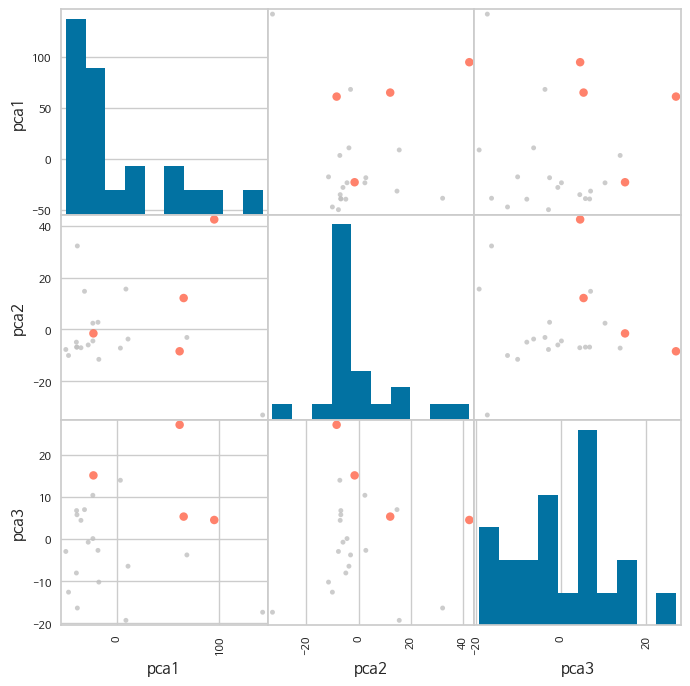

In [ ]:
# 차원축소후 분포 확인
color_wheel = {1: "silver",
               2: "tomato"}
colors = hjd_df['target'].map(lambda x: color_wheel.get(x + 1))
ax = pd.plotting.scatter_matrix(clu_data_pca, color=colors, alpha=0.8, s=(hjd_df['target']+0.5)*100, figsize=(8, 8), diagonal='hist')

## K-means

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10))

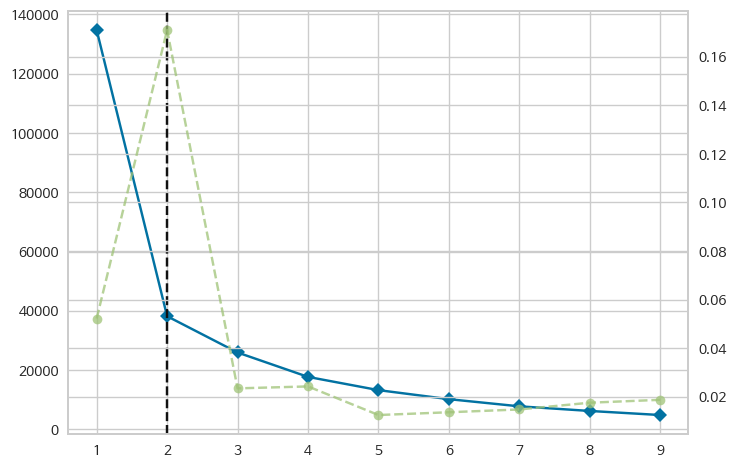

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(clu_data)

In [ ]:
##k=25:17 // k=2

# 클러스터링
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit(clu_data)

# 클러스터링 변수
hjd_df['cluster'] = clusters.labels_
hjd_df.head()

,행정동,인구,남자노인수,여자노인수,남자노인수비율,여자노인수비율,CCTV_개수,60대,70대,80대,90대 이상,총_노인시설,총_노인인구,총_의료기관,안전_지표,target,cluster
0,금암동,17432,1791,2419,0.097131,0.131189,140,1224,1846,1003,135,14,4210,42,18,0,0
1,노송동,10457,1375,1869,0.033903,0.046083,177,888,1402,819,130,22,3244,28,11,0,0
2,덕진동,20590,1349,1793,0.031689,0.042119,196,985,1362,711,83,26,3142,42,11,0,0
3,동서학동,5847,887,1163,0.042377,0.055564,71,645,843,489,72,22,2050,6,10,0,0
4,삼천동,44894,4255,5407,0.028624,0.036373,238,3565,3879,1873,334,60,9662,50,31,1,1


In [ ]:
hjd_df['cluster'].value_counts()

cluster
0    17
1     5
Name: count, dtype: int64

In [ ]:
hjd_df[hjd_df['cluster']==0]['행정동'].values

array(['금암동', '노송동', '덕진동', '동서학동', '서서학동', '서신동', '여의동', '완산동', '우아동',
       '조촌동', '중앙동', '중화산동', '진북동', '팔복동', '풍남동', '혁신동', '호성동'],
      dtype=object)

In [ ]:
hjd_df[hjd_df['cluster']==1]['행정동'].values

array(['삼천동', '송천동', '인후동', '평화동', '효자동'], dtype=object)

### 깃허브 코드

In [ ]:
X = clu_data_pca.iloc[:, [0,1,2]].astype("int")
y = hjd_df['target']   # y 값은 군집에서 사용하지 않는다

from sklearn.cluster import KMeans
model = KMeans(2) #5개의 클러스터로나눔
model.fit(X)

labels = model.labels_

In [ ]:
plot_df = X
plot_df['y'] = y
plot_df['p'] = labels
plot_df.head(3)

,pca1,pca2,pca3,y,p
0,-17,-11,-10,0,0
1,-28,-5,0,0,0
2,-18,2,-2,0,0


In [ ]:
plot_df1 = plot_df[plot_df['y']==0]
plot_df2 = plot_df[plot_df['y']==1]

plot_df_c1 = plot_df[plot_df['p']==0]
plot_df_c2 = plot_df[plot_df['p']==1]

In [ ]:
plot_df2

,pca1,pca2,pca3,y,p
4,61,-8,27,1,1
7,94,42,4,1,1
12,-22,-1,15,1,0
17,65,12,5,1,1


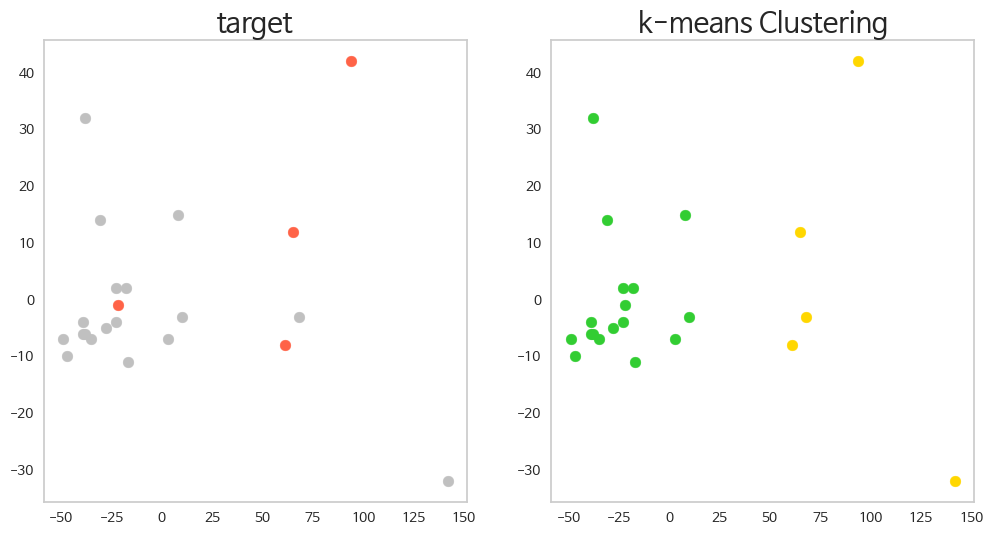

In [ ]:
plt.figure(figsize=[12,6])

plt.subplot(1,2,1)
plt.title('target', fontsize=20)

plt.scatter(plot_df1['pca1'], plot_df1['pca2'], c="silver", s=60)
plt.scatter(plot_df2['pca1'], plot_df2['pca2'], c="tomato", s=60)
plt.grid(False)

plt.subplot(1,2,2)
plt.title('k-means Clustering', fontsize=20)
plt.scatter(plot_df_c1['pca1'], plot_df_c1['pca2'], c="limegreen", s=60)
plt.scatter(plot_df_c2['pca1'], plot_df_c2['pca2'], c="gold", s=60)
plt.grid(False)

In [ ]:
hjd_df['kmeansP'] = plot_df['p']

hjd_df[hjd_df['target']==1]

,행정동,인구,남자노인수,여자노인수,남자노인수비율,여자노인수비율,CCTV_개수,60대,70대,80대,90대 이상,총_노인시설,총_노인인구,총_의료기관,안전_지표,target,cluster,kmeansP
4,삼천동,44894,4255,5407,0.028624,0.036373,238,3565,3879,1873,334,60,9662,50,31,1,1,1
7,송천동,90039,4372,5549,0.020743,0.026327,237,3738,4019,1842,318,70,9921,126,22,1,1,1
12,조촌동,12064,1180,1533,0.004204,0.005462,58,886,1121,607,97,36,2713,14,10,1,0,0
17,평화동,55366,5105,7060,0.020679,0.028598,234,4152,5087,2521,397,51,12165,81,21,1,1,1


In [ ]:
len(hjd_df[hjd_df['kmeansP']==1])

5

In [ ]:
len(hjd_df[hjd_df['target']==1])

4

In [ ]:
hjd_final = hjd_df.loc[(hjd_df['target']==1) & (hjd_df['kmeansP']==1)]
hjd_final.reset_index(drop=True,inplace=True)
hjd_final = hjd_final[['행정동']]
hjd_final

,행정동
0,삼천동
1,송천동
2,평화동


## Hierachical

In [ ]:
X = clu_data.iloc[:,5:]
print(X.shape)
X.head(3)

(22, 3)


,pca1,pca2,pca3
0,-17.651024,-11.511468,-10.195929
1,-28.031373,-5.979190,-0.740494
2,-18.488790,2.769853,-2.678778


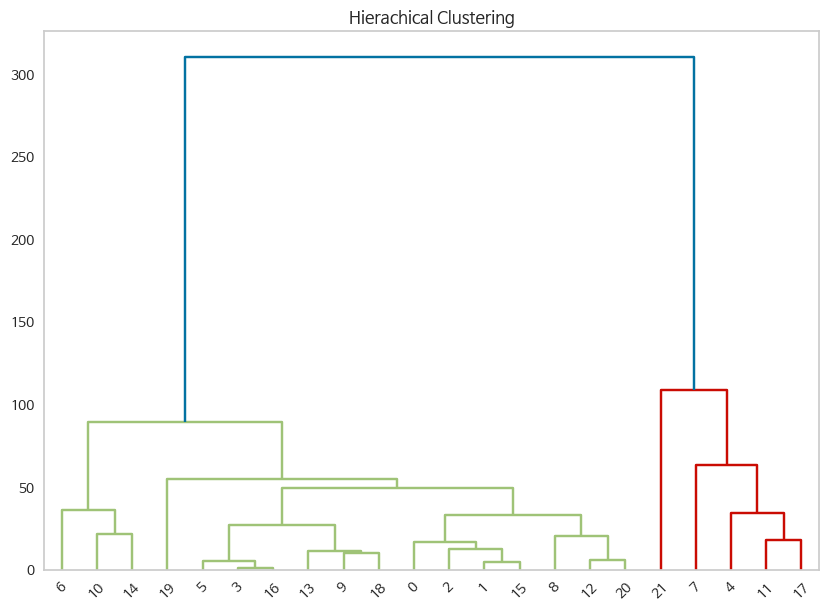

In [ ]:
data = X.values


import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Hierachical Clustering")
dend = shc.dendrogram(shc.linkage(data, method='ward'))
plt.grid(False)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([0, 0, 0, 0, 3, 0, 1, 4, 0, 0, 1, 3, 0, 0, 1, 0, 0, 3, 0, 0, 0, 2])

In [ ]:
plot_df = X
plot_df['y'] = y
plot_df['p'] = cluster.fit_predict(data)
print(plot_df.shape)
plot_df.head(3)

(22, 5)


,pca1,pca2,pca3,y,p
0,-17.651024,-11.511468,-10.195929,0,0
1,-28.031373,-5.979190,-0.740494,0,0
2,-18.488790,2.769853,-2.678778,0,0


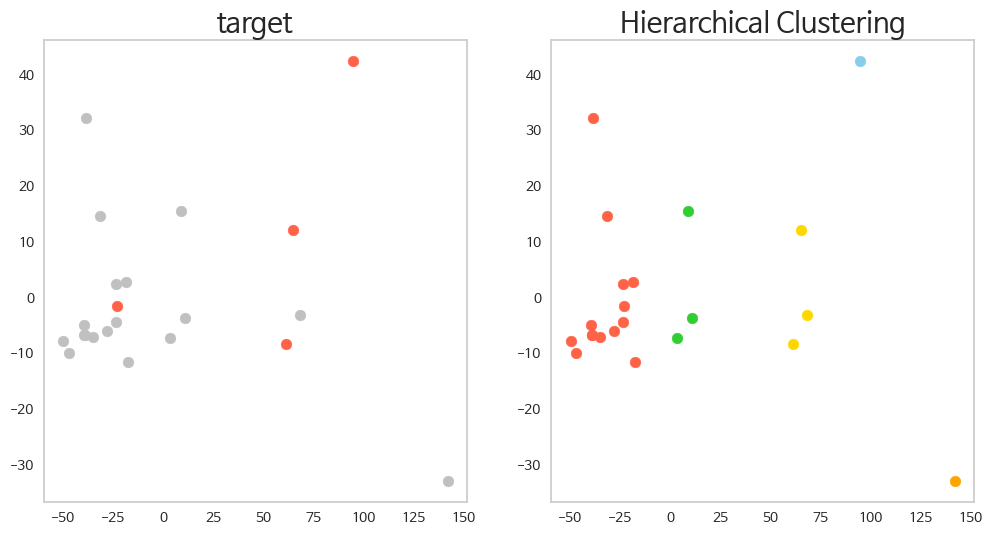

In [ ]:

plot_df1 = plot_df[plot_df['y']==0]
plot_df2 = plot_df[plot_df['y']==1]

plot_df_c1 = plot_df[plot_df['p']==0]
plot_df_c2 = plot_df[plot_df['p']==1]
plot_df_c3 = plot_df[plot_df['p']==2]
plot_df_c4 = plot_df[plot_df['p']==3]
plot_df_c5 = plot_df[plot_df['p']==4]

plt.figure(figsize=[12,6])

plt.subplot(1,2,1)
plt.title('target', fontsize=20)

plt.scatter(plot_df1['pca1'], plot_df1['pca2'], c="silver", s=60)
plt.scatter(plot_df2['pca1'], plot_df2['pca2'], c="tomato", s=60)
plt.grid(False)

plt.subplot(1,2,2)
plt.title('Hierarchical Clustering', fontsize=20)
plt.scatter(plot_df_c1['pca1'], plot_df_c1['pca2'], c="tomato", s=60)
plt.scatter(plot_df_c2['pca1'], plot_df_c2['pca2'], c="limegreen", s=60)
plt.scatter(plot_df_c3['pca1'], plot_df_c3['pca2'], c="orange", s=60)
plt.scatter(plot_df_c4['pca1'], plot_df_c4['pca2'], c="gold", s=60)
plt.scatter(plot_df_c5['pca1'], plot_df_c5['pca2'], c="skyblue", s=60)
plt.grid(False)

In [ ]:
hjd_df['hierarchicalP'] = cluster.fit_predict(data)
hjd_df.head(3)

,행정동,인구,남자노인수,여자노인수,남자노인수비율,여자노인수비율,CCTV_개수,60대,70대,80대,90대 이상,총_노인시설,총_노인인구,총_의료기관,안전_지표,target,cluster,kmeansP,hierarchicalP
0,금암동,17432,1791,2419,0.097131,0.131189,140,1224,1846,1003,135,14,4210,42,18,0,0,0,0
1,노송동,10457,1375,1869,0.033903,0.046083,177,888,1402,819,130,22,3244,28,11,0,0,0,0
2,덕진동,20590,1349,1793,0.031689,0.042119,196,985,1362,711,83,26,3142,42,11,0,0,0,0


In [ ]:
hjd_df[hjd_df['target']==1]

,행정동,인구,남자노인수,여자노인수,남자노인수비율,여자노인수비율,CCTV_개수,60대,70대,80대,90대 이상,총_노인시설,총_노인인구,총_의료기관,안전_지표,target,cluster,kmeansP,hierarchicalP
4,삼천동,44894,4255,5407,0.028624,0.036373,238,3565,3879,1873,334,60,9662,50,31,1,1,1,3
7,송천동,90039,4372,5549,0.020743,0.026327,237,3738,4019,1842,318,70,9921,126,22,1,1,1,4
12,조촌동,12064,1180,1533,0.004204,0.005462,58,886,1121,607,97,36,2713,14,10,1,0,0,0
17,평화동,55366,5105,7060,0.020679,0.028598,234,4152,5087,2521,397,51,12165,81,21,1,1,1,3


In [ ]:
hjd_final = hjd_df.loc[(hjd_df['target'] == 1) & ((hjd_df['hierarchicalP'] == 3) | (hjd_df['hierarchicalP'] == 4))]
hjd_final.reset_index(drop=True,inplace=True)
hjd_final = hjd_final[['행정동']]
hjd_final

,행정동
0,삼천동
1,송천동
2,평화동


## meanshift _ 그냥 빼도 될 듯 함!

In [ ]:
X = clu_data.iloc[:,5:]
print(X.shape)
X.head(3)

(22, 3)


,pca1,pca2,pca3
0,-17.651024,-11.511468,-10.195929
1,-28.031373,-5.979190,-0.740494
2,-18.488790,2.769853,-2.678778


In [ ]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 35.85


In [ ]:
from sklearn.cluster import MeanShift

meanshift= MeanShift(bandwidth=25.974)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5 6]


In [ ]:
import pandas as pd

clusterDF = X
clusterDF['y'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift= MeanShift(bandwidth=25.974)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5 6]


In [ ]:
print(clusterDF.shape)
clusterDF.head(3)

plot_df = X
# plot_df['y'] = y
plot_df['p'] = cluster_labels
print(plot_df.shape)
plot_df.head(3)

(22, 4)
(22, 5)


,pca1,pca2,pca3,y,p
0,-17.651024,-11.511468,-10.195929,0,0
1,-28.031373,-5.979190,-0.740494,0,0
2,-18.488790,2.769853,-2.678778,0,0


In [ ]:
plot_df1 = plot_df[plot_df['y']==0]
plot_df2 = plot_df[plot_df['y']==1]

plot_df_c1 = plot_df[plot_df['p']==0]
plot_df_c2 = plot_df[plot_df['p']==1]
plot_df_c3 = plot_df[plot_df['p']==2]
plot_df_c4 = plot_df[plot_df['p']==3]
plot_df_c5 = plot_df[plot_df['p']==4]

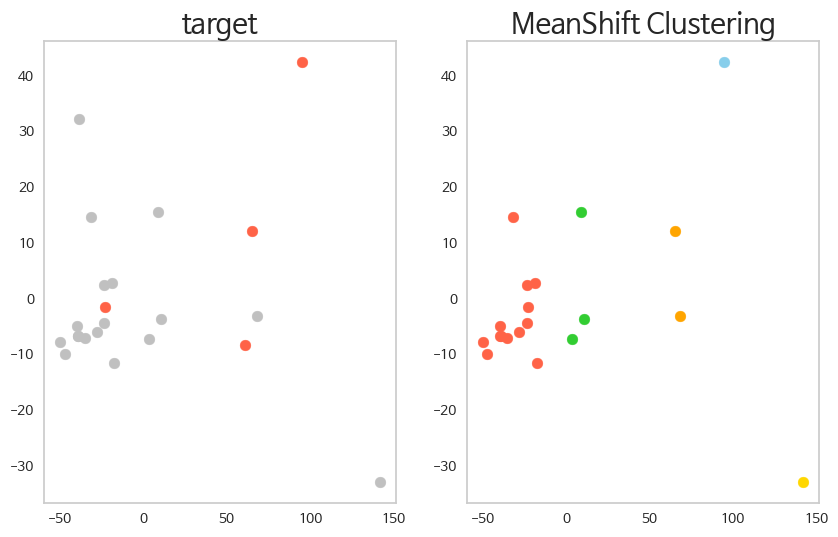

In [ ]:
plt.figure(figsize=[10,6])

plt.subplot(1,2,1)
plt.title('target', fontsize=20)

plt.scatter(plot_df1['pca1'], plot_df1['pca2'], c="silver", s=60)
plt.scatter(plot_df2['pca1'], plot_df2['pca2'], c="tomato", s=60)
plt.grid(False)

plt.subplot(1,2,2)
plt.title('MeanShift Clustering', fontsize=20)
plt.scatter(plot_df_c1['pca1'], plot_df_c1['pca2'], c="tomato", s=60)
plt.scatter(plot_df_c2['pca1'], plot_df_c2['pca2'], c="limegreen", s=60)
plt.scatter(plot_df_c3['pca1'], plot_df_c3['pca2'], c="orange", s=60)
plt.scatter(plot_df_c4['pca1'], plot_df_c4['pca2'], c="gold", s=60)
plt.scatter(plot_df_c5['pca1'], plot_df_c5['pca2'], c="skyblue", s=60)
plt.grid(False)

In [ ]:
hjd_df['MSP'] = plot_df['p']
hjd_final = hjd_df.loc[(hjd_df['target']==1) & (hjd_df['MSP']==2)]
hjd_final.reset_index(drop=True,inplace=True)
hjd_final = hjd_final[['행정동']]
hjd_final

,행정동
0,평화동
